In [256]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [257]:
def ag2(angle):
    return angle/np.pi*180
angle3 = ag2(np.loadtxt('ch_angle3.csv'))
#angle1 = ag2(np.load('angle_1d.npy').T)
or_angle3 = angle3.copy()

Text(0.5, 0, 'time')

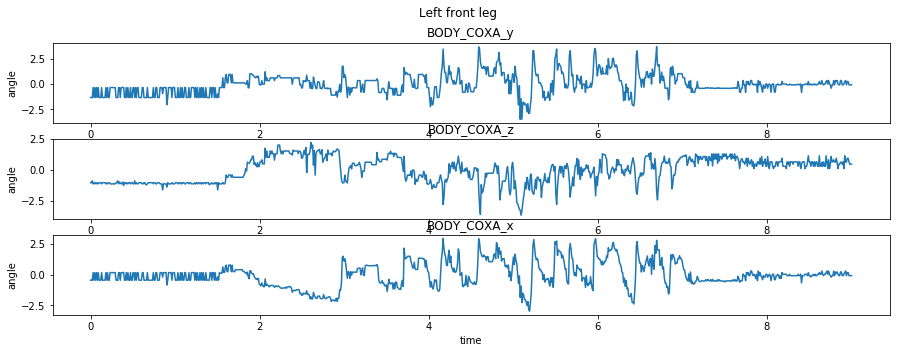

In [244]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize = (15,5))
fig.suptitle('Left front leg')
ax1.plot(t,angle3[0])
ax1.set_title('BODY_COXA_y')
ax1.set_ylabel('angle')
ax1.set_xlabel('time')

ax2.plot(t,angle3[1])
ax2.set_title('BODY_COXA_z')
ax2.set_ylabel('angle')
ax2.set_xlabel('time')

ax3.plot(t,angle3[2])
ax3.set_title('BODY_COXA_x')
ax3.set_ylabel('angle')
ax3.set_xlabel('time')

## original angle data of x-axis rotation of left front leg

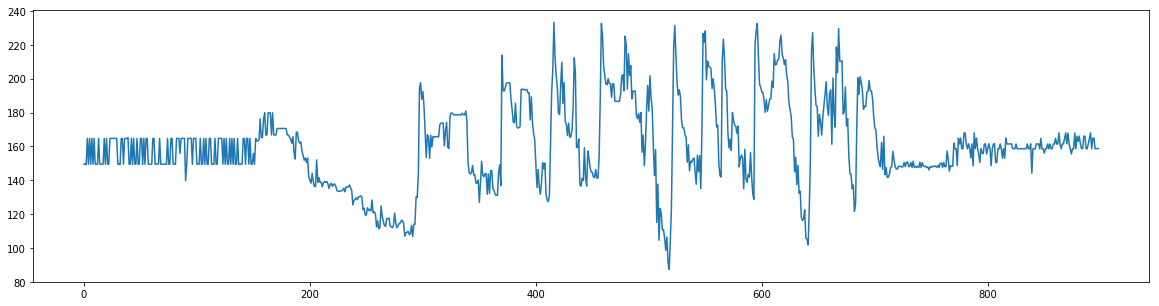

In [145]:
p = 2
fig = plt.figure(figsize=(20,5))
plt.plot(t, angle3[p])

In [175]:
def mydft(data):
    N = data.shape[0]
    n = np.linspace(0,N-1,N)
    return np.exp( -2 * np.pi * 1j * np.outer(n,n) / N ) @ data

def inv_dft(data):
    N = data.shape[0]
    n = np.linspace(0,N-1,N)
    return np.exp( 2 * np.pi * 1j * np.outer(n,n) / N ) @ data / N
def shift(data):
    mid = int((data.shape[0]+1)/2)
    res = data[mid:]
    res = np.concatenate((res, data[:mid]))
    return res
N = 899
n = np.linspace(0,N-1,N)
H = np.exp( 2 * np.pi * 1j * np.outer(n,n) / N )@np.exp( -2 * np.pi * 1j * np.outer(n,n) / N )/N
np.diag(H).mean()

(1+0j)

In [151]:
t_dom = angle3[2]
t_dom -= np.mean(t_dom)
t_dom /= np.std(t_dom)
fr = mydft(t_dom)

## normalized data in time domain

Text(0.5, 0, 'Time (s)')

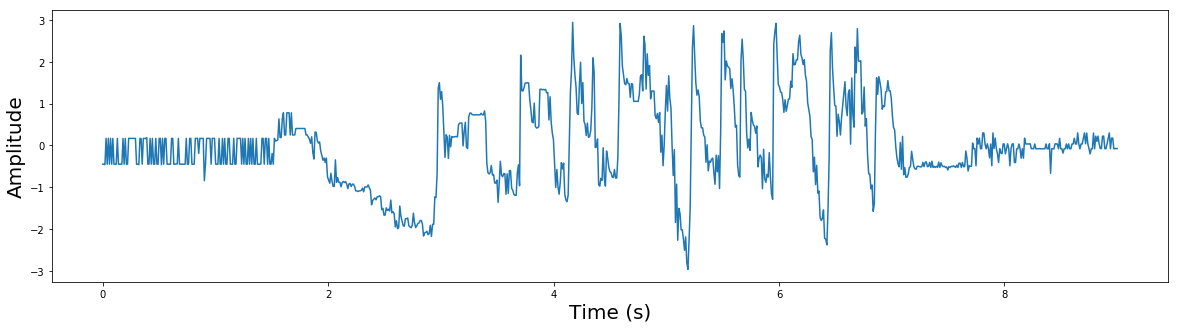

In [191]:
fig = plt.figure(figsize=(20,5))
plt.plot(t, t_dom)
plt.ylabel('Amplitude', fontsize=20)
plt.xlabel('Time (s)', fontsize=20)


In [162]:
fig.savefig('../../Pictures/normalized_lf_x.jpg')

 ## test inverse fourier function

Text(0.5, 0, 'Time (s)')

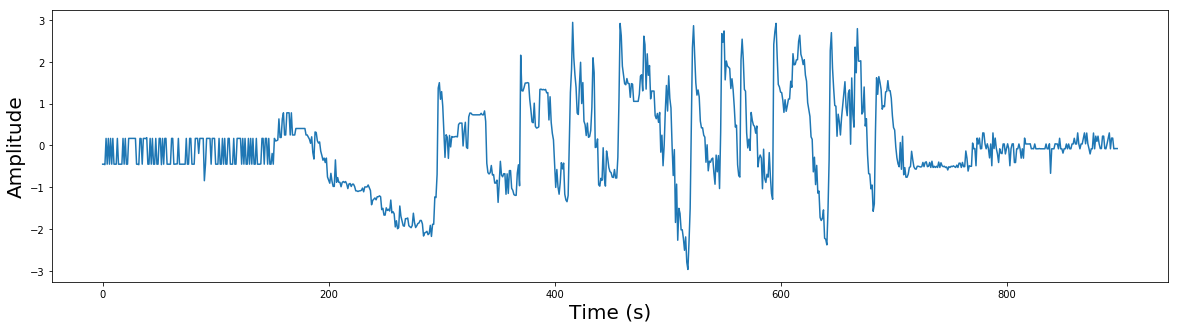

In [192]:
fig2 = plt.figure(1,figsize=(20,5))
plt.plot(inv_dft(fr))
plt.ylabel('Amplitude', fontsize=20)
plt.xlabel('Time (s)', fontsize=20)

## absolute value of function in fourier domain

Text(0.5, 0, 'Frequency (Hz)')

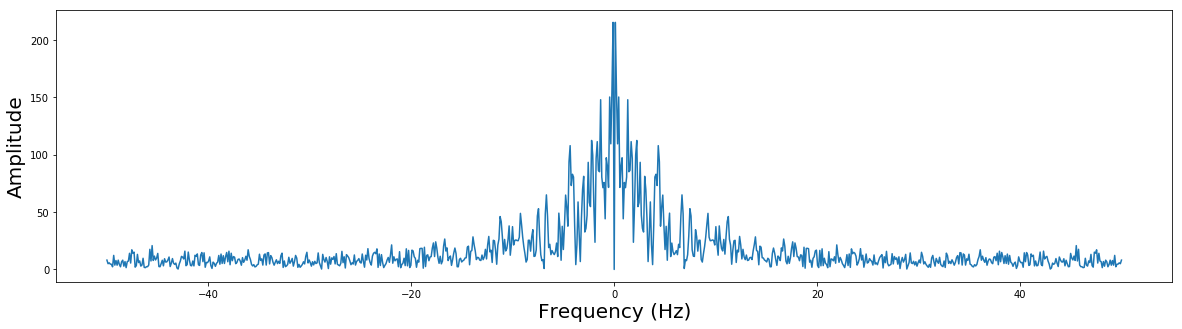

In [190]:
delta_t = 0.01
f = np.linspace(-1/(2*delta_t), 1/(2*delta_t), N)
fig = plt.figure(figsize=(20,5))
plt.plot(f,shift(np.abs(fr)))
plt.ylabel('Amplitude', fontsize=20)
plt.xlabel('Frequency (Hz)', fontsize=20)

In [159]:
fig.savefig('../../Pictures/absolute_fourier_lf_x.jpg')

## real part

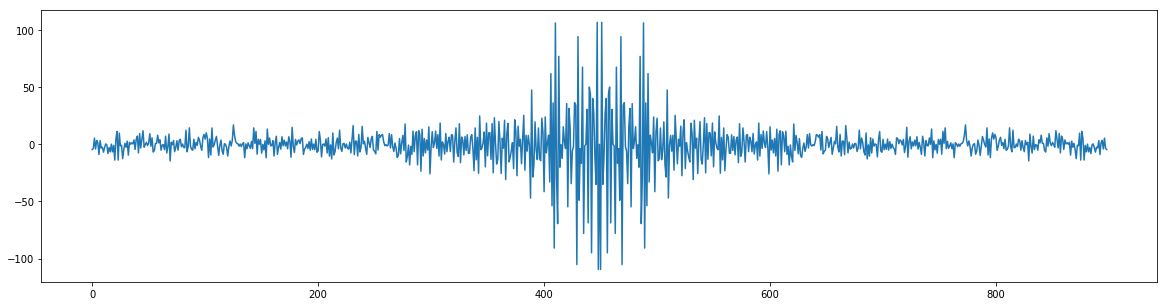

In [52]:
fig = plt.figure(figsize=(20,5))
plt.plot(shift(np.real(fr)))

## imaginary part 

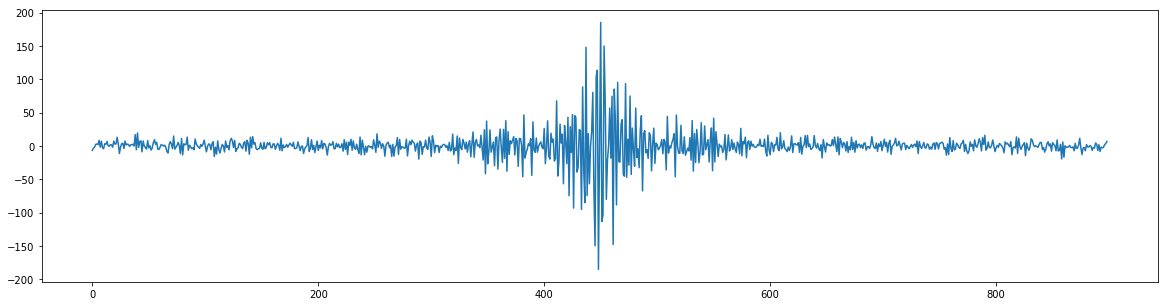

In [53]:
fig = plt.figure(figsize=(20,5))
plt.plot(shift(np.imag(fr)))

## low pass filtering

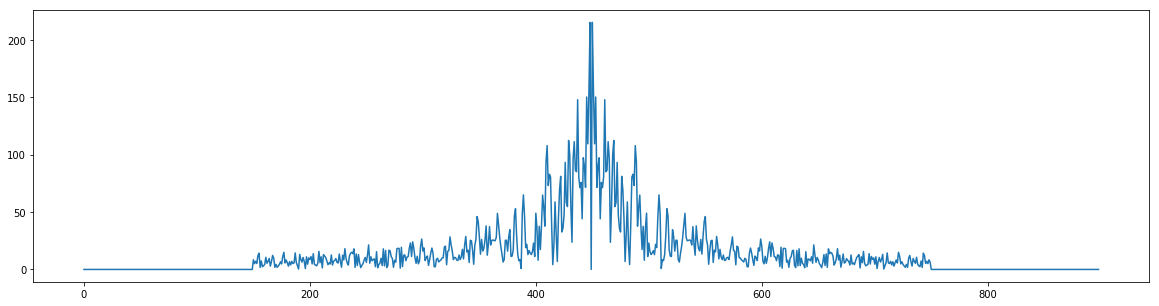

In [124]:
filter_ = np.zeros(899)
center = 450
scope = 300
filter_[center-scope:center+scope] = 1
fig = plt.figure(1,figsize=(20,5))
plt.plot(np.abs(shift(fr)*filter_))

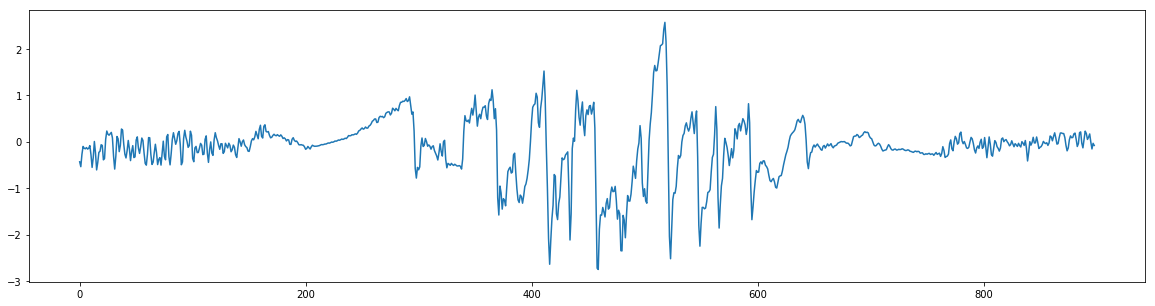

In [125]:
fig2 = plt.figure(1,figsize=(20,5))
plt.plot(inv_dft(shift(shift(fr)*filter_)))

## reference

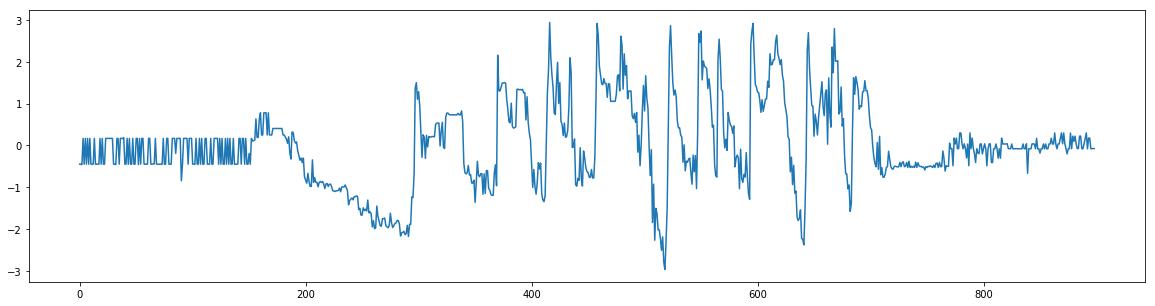

In [116]:
p = 2
fig = plt.figure(figsize=(20,5))
plt.plot(t, t_dom)

# verify other angles

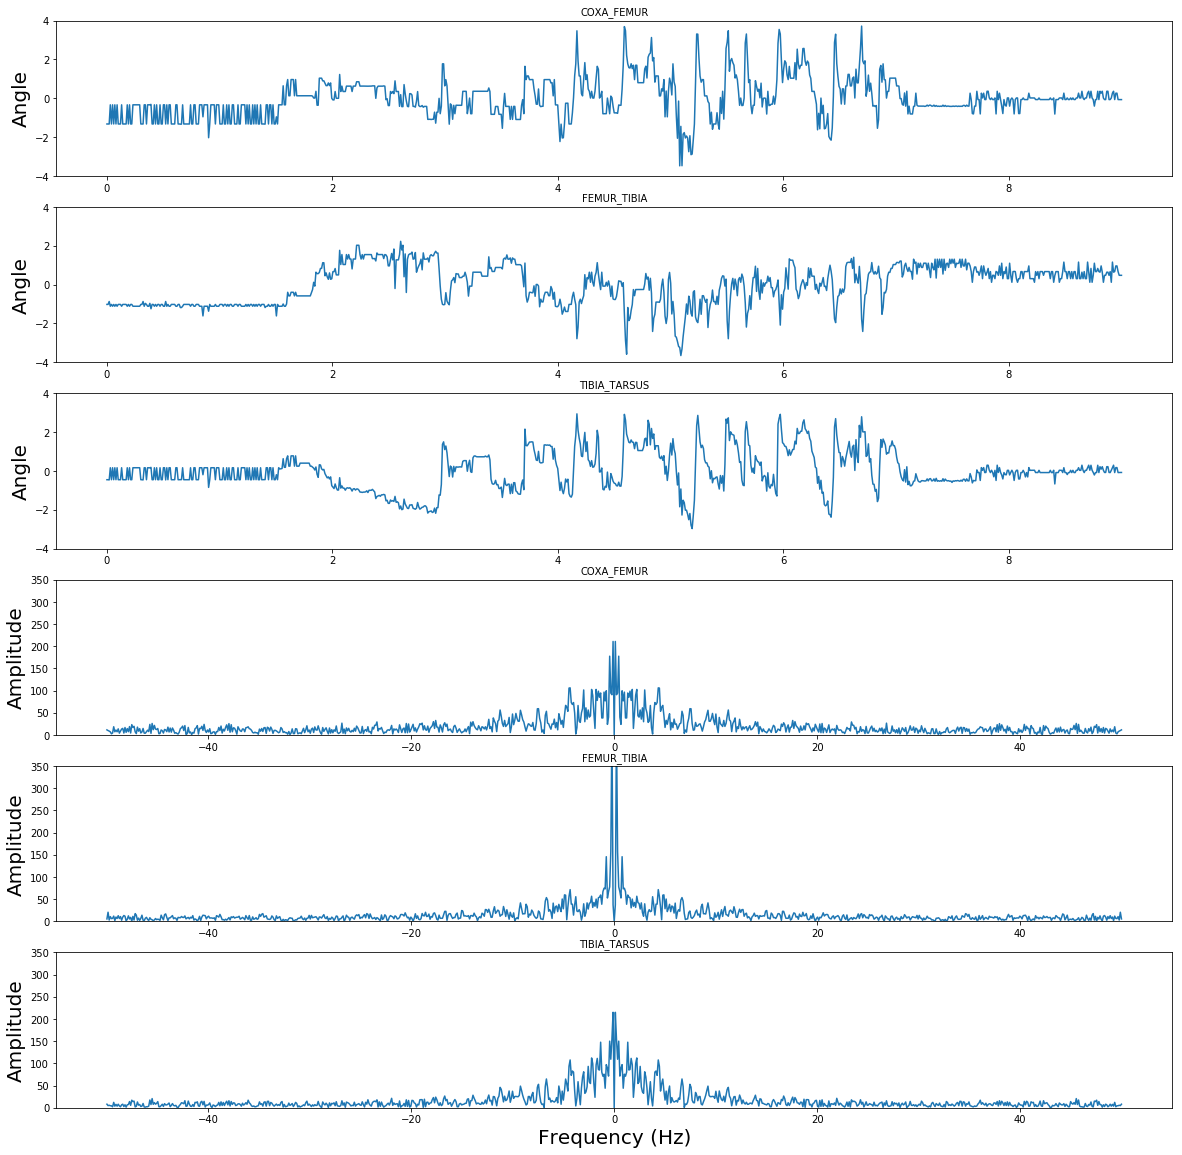

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

In [290]:
N = 899
delta_t = 0.01
f = np.linspace(-1/(2*delta_t), 1/(2*delta_t), N)
t = np.linspace(0,9,N)

leg = 0
fig, axs = plt.subplots(6,1,figsize=(20,20))
#fig.suptitle('right front leg',fontsize=20)
for i in range(3):
    id_ = leg*3 + i
    t_dom = angle3[id_]
    t_dom -= np.mean(t_dom)
    t_dom /= np.std(t_dom)
    fr = mydft(t_dom)

    fig = plt.figure(figsize=(20,3))
    axs[i].plot(t, t_dom)
    axs[i].set_title(name[i], fontsize=10)
    axs[i].set_ylabel('Angle', fontsize=20)
    #axs[i*2].set_xlabel('Time (s)', fontsize=10)
    axs[i].set_ylim(-4,4)

    fig = plt.figure(figsize=(20,3))
    axs[i+3].plot(f,shift(np.abs(fr)))
    axs[i+3].set_title(name[i], fontsize=10)
    axs[i+3].set_ylabel('Amplitude', fontsize=20)
    axs[5].set_xlabel('Frequency (Hz)', fontsize=20)
    axs[i+3].set_ylim(0,350)

left middle leg


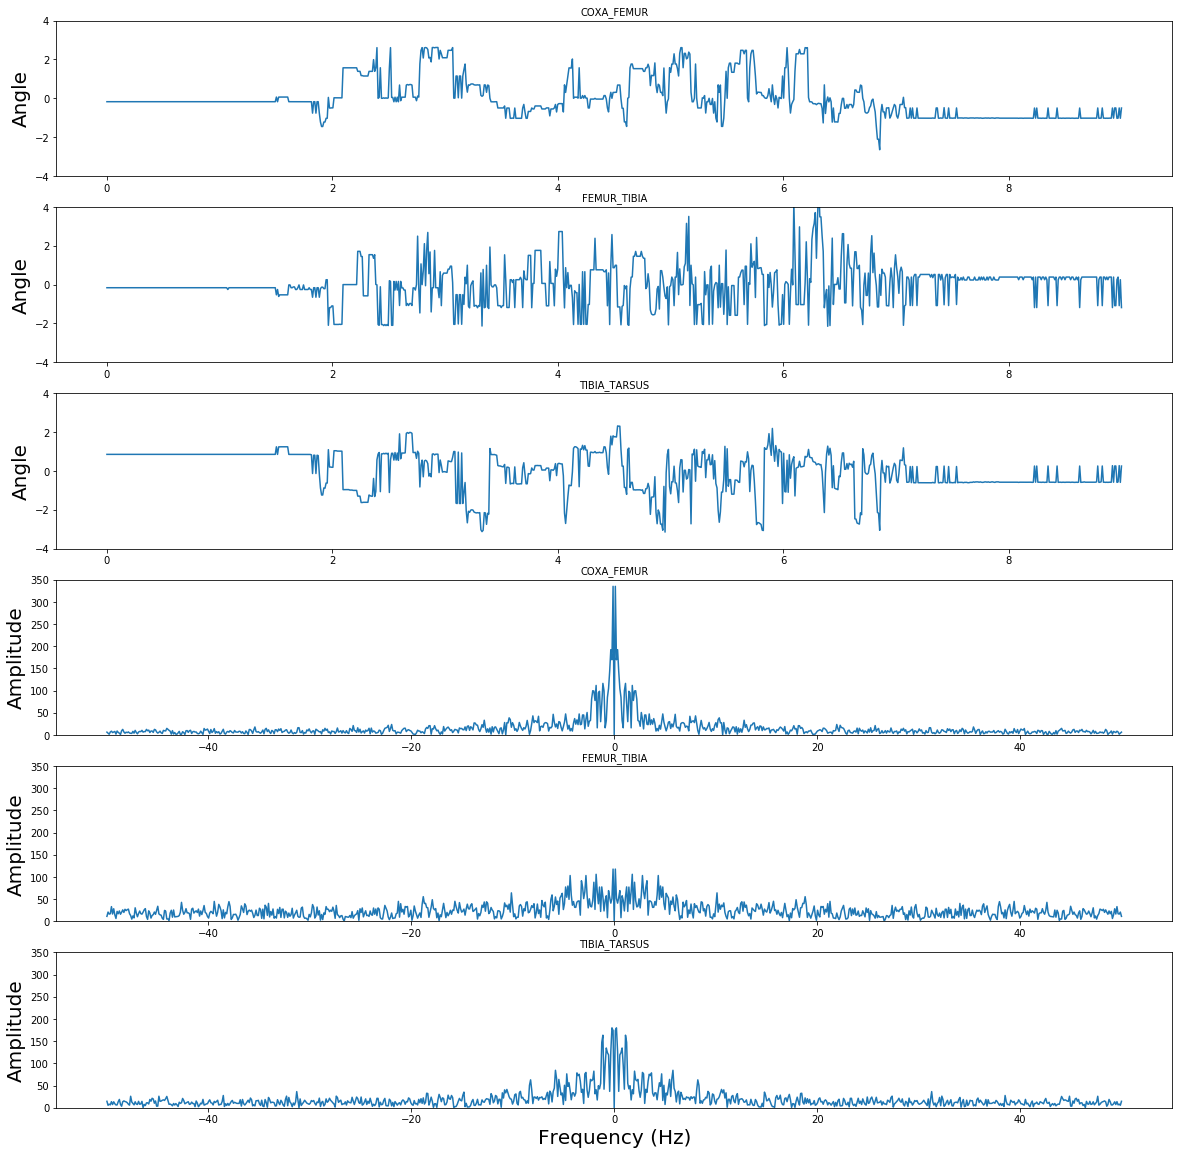

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

In [291]:
print('left middle leg')
leg = 1
fig, axs = plt.subplots(6,1,figsize=(20,20))
#fig.suptitle('right front leg',fontsize=20)
for i in range(3):
    id_ = leg*3 + i
    t_dom = angle3[id_]
    t_dom -= np.mean(t_dom)
    t_dom /= np.std(t_dom)
    fr = mydft(t_dom)

    fig = plt.figure(figsize=(20,3))
    axs[i].plot(t, t_dom)
    axs[i].set_title(name[i], fontsize=10)
    axs[i].set_ylabel('Angle', fontsize=20)
    #axs[i*2].set_xlabel('Time (s)', fontsize=10)
    axs[i].set_ylim(-4,4)

    fig = plt.figure(figsize=(20,3))
    axs[i+3].plot(f,shift(np.abs(fr)))
    axs[i+3].set_title(name[i], fontsize=10)
    axs[i+3].set_ylabel('Amplitude', fontsize=20)
    axs[5].set_xlabel('Frequency (Hz)', fontsize=20)
    axs[i+3].set_ylim(0,350)

left hind leg


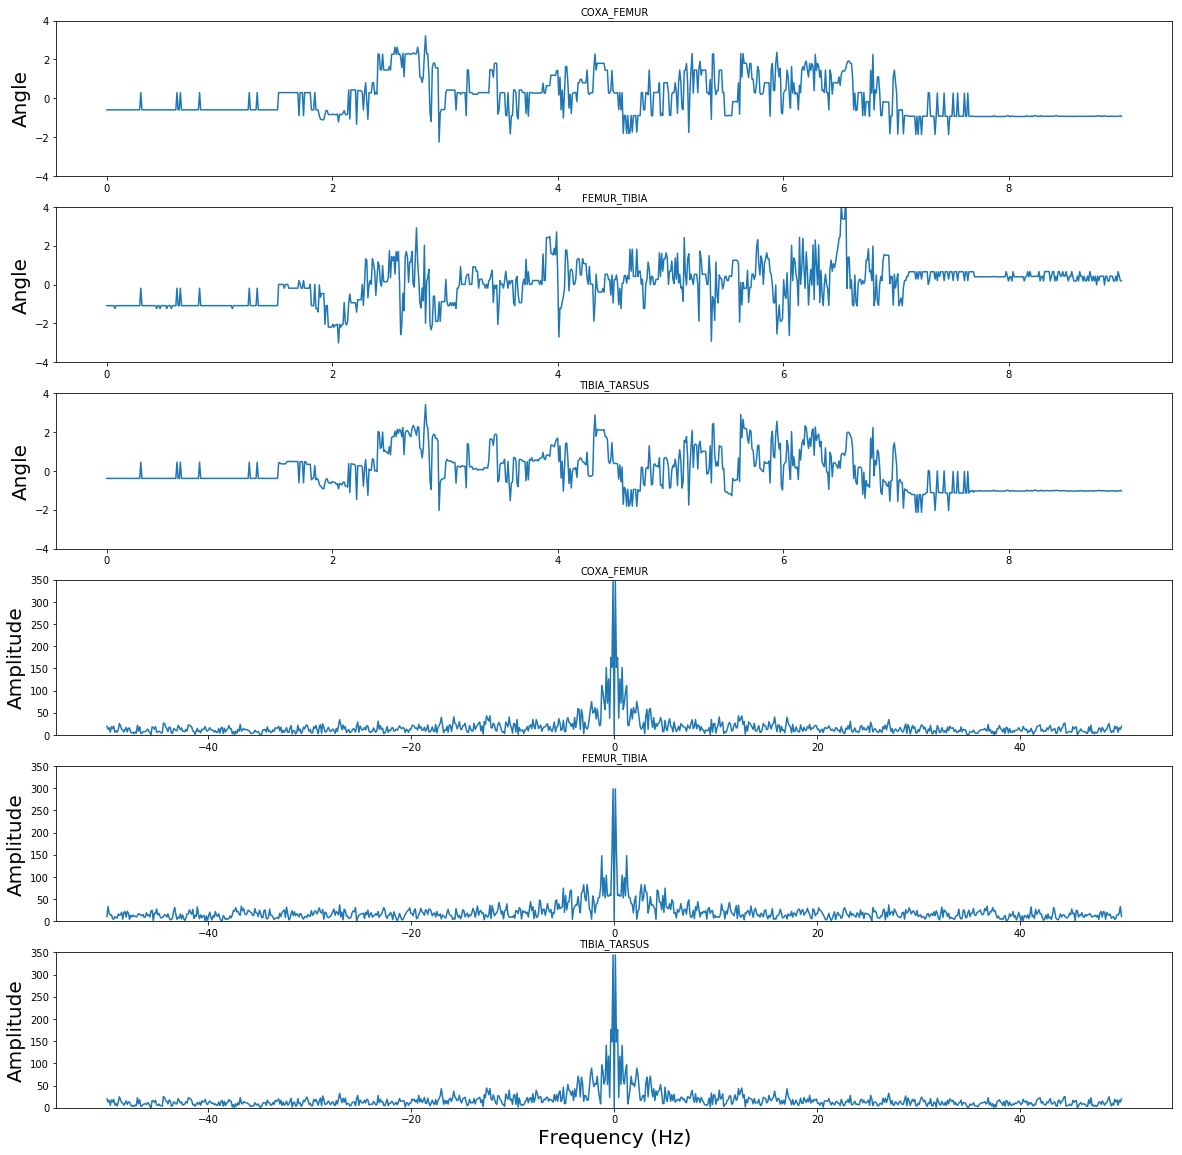

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

In [292]:
print('left hind leg')
leg = 2
fig, axs = plt.subplots(6,1,figsize=(20,20))
#fig.suptitle('right front leg',fontsize=20)
for i in range(3):
    id_ = leg*3 + i
    t_dom = angle3[id_]
    t_dom -= np.mean(t_dom)
    t_dom /= np.std(t_dom)
    fr = mydft(t_dom)

    fig = plt.figure(figsize=(20,3))
    axs[i].plot(t, t_dom)
    axs[i].set_title(name[i], fontsize=10)
    axs[i].set_ylabel('Angle', fontsize=20)
    #axs[i*2].set_xlabel('Time (s)', fontsize=10)
    axs[i].set_ylim(-4,4)

    fig = plt.figure(figsize=(20,3))
    axs[i+3].plot(f,shift(np.abs(fr)))
    axs[i+3].set_title(name[i], fontsize=10)
    axs[i+3].set_ylabel('Amplitude', fontsize=20)
    axs[5].set_xlabel('Frequency (Hz)', fontsize=20)
    axs[i+3].set_ylim(0,350)

right front leg


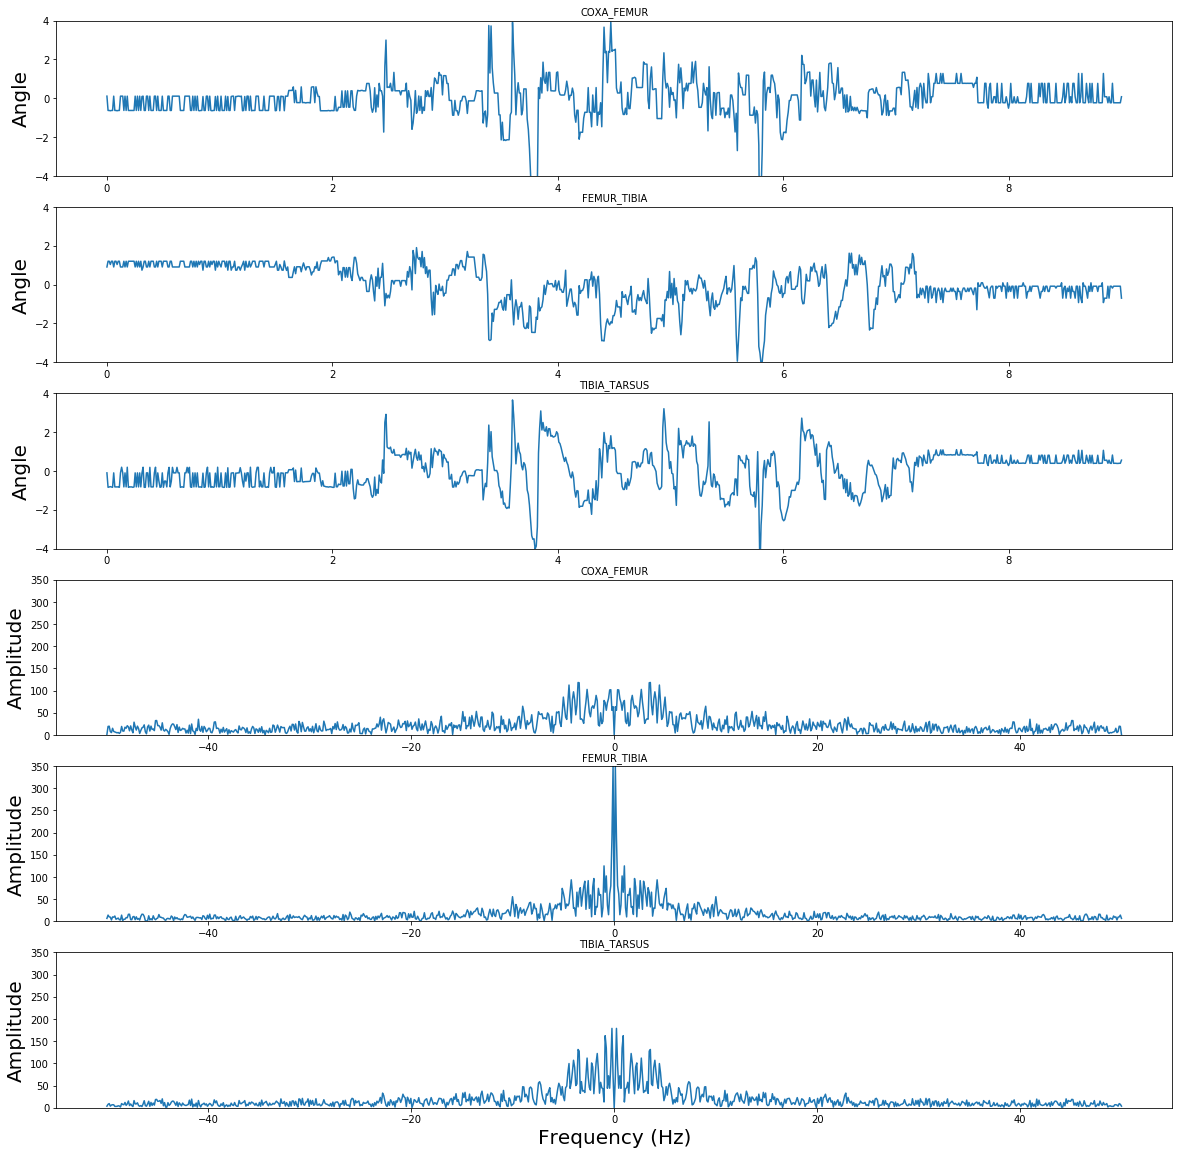

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

In [293]:
print('right front leg')
leg = 3
fig, axs = plt.subplots(6,1,figsize=(20,20))
#fig.suptitle('right front leg',fontsize=20)
for i in range(3):
    id_ = leg*3 + i
    t_dom = angle3[id_]
    t_dom -= np.mean(t_dom)
    t_dom /= np.std(t_dom)
    fr = mydft(t_dom)

    fig = plt.figure(figsize=(20,3))
    axs[i].plot(t, t_dom)
    axs[i].set_title(name[i], fontsize=10)
    axs[i].set_ylabel('Angle', fontsize=20)
    #axs[i*2].set_xlabel('Time (s)', fontsize=10)
    axs[i].set_ylim(-4,4)

    fig = plt.figure(figsize=(20,3))
    axs[i+3].plot(f,shift(np.abs(fr)))
    axs[i+3].set_title(name[i], fontsize=10)
    axs[i+3].set_ylabel('Amplitude', fontsize=20)
    axs[5].set_xlabel('Frequency (Hz)', fontsize=20)
    axs[i+3].set_ylim(0,350)

right middle leg


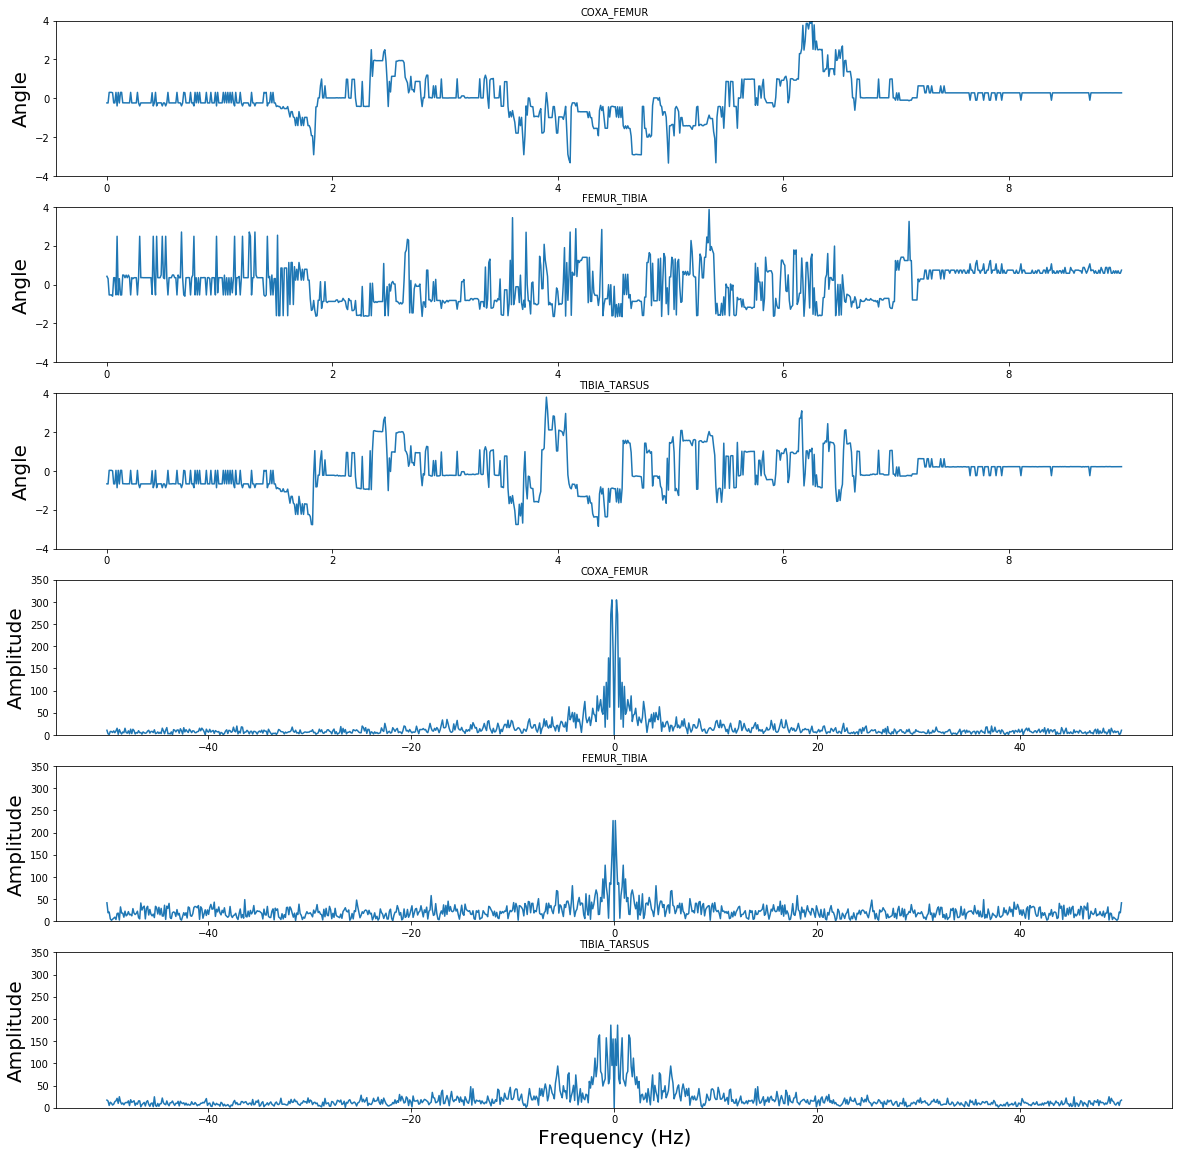

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

In [294]:
print('right middle leg')
leg = 4
fig, axs = plt.subplots(6,1,figsize=(20,20))
#fig.suptitle('right front leg',fontsize=20)
for i in range(3):
    id_ = leg*3 + i
    t_dom = angle3[id_]
    t_dom -= np.mean(t_dom)
    t_dom /= np.std(t_dom)
    fr = mydft(t_dom)

    fig = plt.figure(figsize=(20,3))
    axs[i].plot(t, t_dom)
    axs[i].set_title(name[i], fontsize=10)
    axs[i].set_ylabel('Angle', fontsize=20)
    #axs[i*2].set_xlabel('Time (s)', fontsize=10)
    axs[i].set_ylim(-4,4)

    fig = plt.figure(figsize=(20,3))
    axs[i+3].plot(f,shift(np.abs(fr)))
    axs[i+3].set_title(name[i], fontsize=10)
    axs[i+3].set_ylabel('Amplitude', fontsize=20)
    axs[5].set_xlabel('Frequency (Hz)', fontsize=20)
    axs[i+3].set_ylim(0,350)

right middle leg


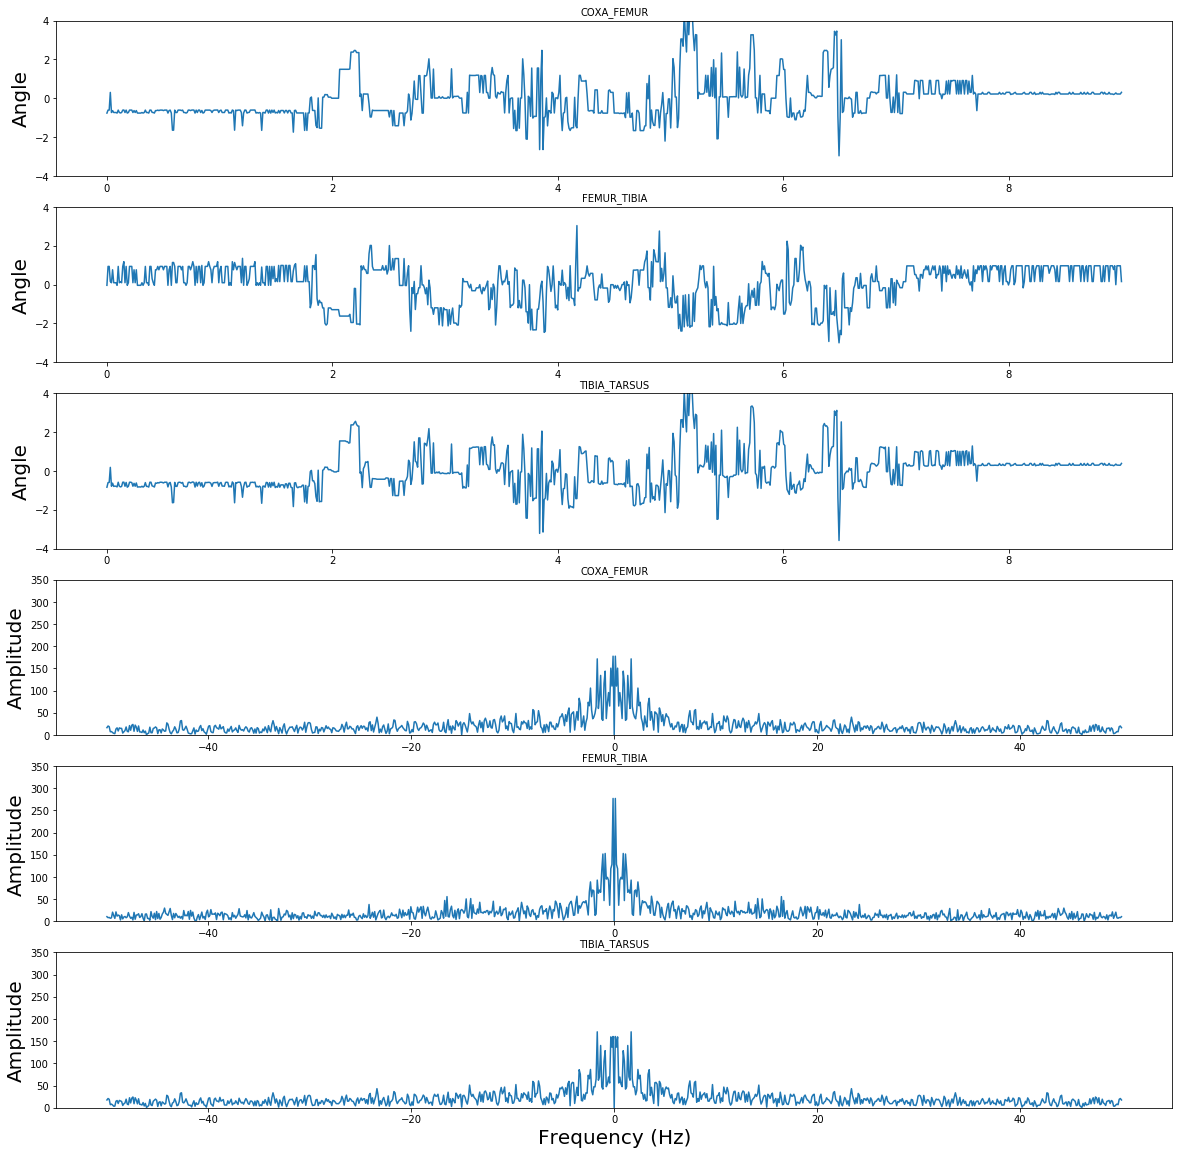

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

In [295]:
print('right middle leg')
leg = 5
fig, axs = plt.subplots(6,1,figsize=(20,20))
#fig.suptitle('right front leg',fontsize=20)
for i in range(3):
    id_ = leg*3 + i
    t_dom = angle3[id_]
    t_dom -= np.mean(t_dom)
    t_dom /= np.std(t_dom)
    fr = mydft(t_dom)

    fig = plt.figure(figsize=(20,3))
    axs[i].plot(t, t_dom)
    axs[i].set_title(name[i], fontsize=10)
    axs[i].set_ylabel('Angle', fontsize=20)
    #axs[i*2].set_xlabel('Time (s)', fontsize=10)
    axs[i].set_ylim(-4,4)

    fig = plt.figure(figsize=(20,3))
    axs[i+3].plot(f,shift(np.abs(fr)))
    axs[i+3].set_title(name[i], fontsize=10)
    axs[i+3].set_ylabel('Amplitude', fontsize=20)
    axs[5].set_xlabel('Frequency (Hz)', fontsize=20)
    axs[i+3].set_ylim(0,350)

# 1 doF joint angles

In [255]:
angle1 = ag2(np.load('angle_1d.npy')).T
print("The shape of angle1 is", angle1.shape)
for i in range(6):
    angle1[i*3+1] = -angle1[i*3+1]
angle1 = 180 - angle1
name = ['COXA_FEMUR', 'FEMUR_TIBIA','TIBIA_TARSUS']

The shape of angle1 is (18, 899)


left front


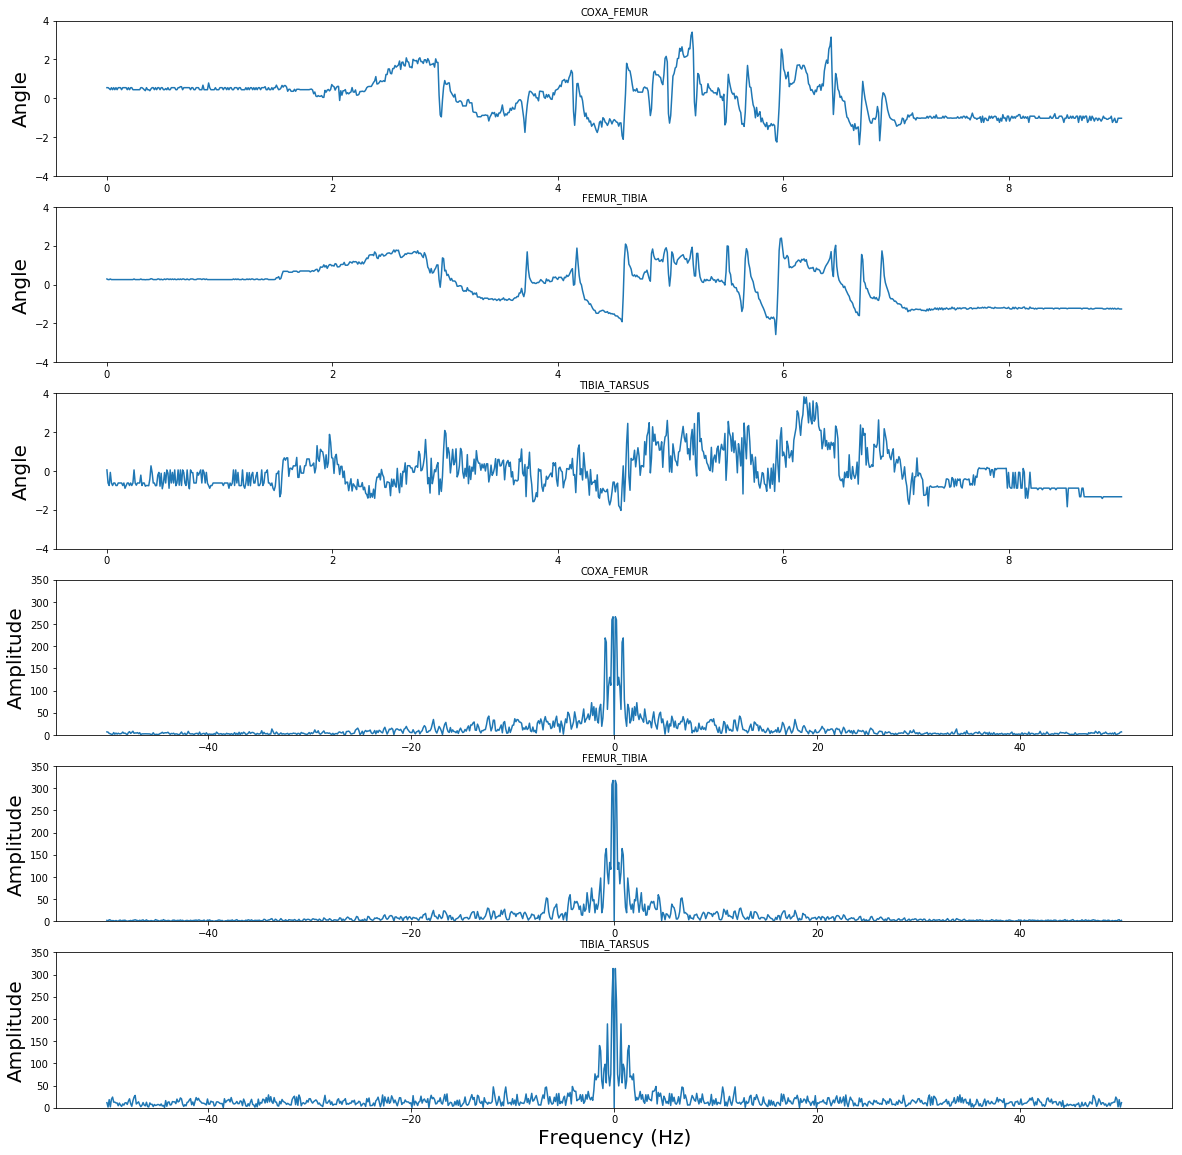

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

In [284]:
print("left front")
leg = 0
fig, axs = plt.subplots(6,1,figsize=(20,20))
for i in range(3):
    id_ = leg*3 + i
    t_dom = angle1[id_]
    t_dom -= np.mean(t_dom)
    t_dom /= np.std(t_dom)
    fr = mydft(t_dom)

    fig = plt.figure(figsize=(20,3))
    axs[i].plot(t, t_dom)
    axs[i].set_title(name[i], fontsize=10)
    axs[i].set_ylabel('Angle', fontsize=20)
    #axs[i*2].set_xlabel('Time (s)', fontsize=10)
    axs[i].set_ylim(-4,4)

    fig = plt.figure(figsize=(20,3))
    axs[i+3].plot(f,shift(np.abs(fr)))
    axs[i+3].set_title(name[i], fontsize=10)
    axs[i+3].set_ylabel('Amplitude', fontsize=20)
    axs[5].set_xlabel('Frequency (Hz)', fontsize=20)
    axs[i+3].set_ylim(0,350)

left middle leg


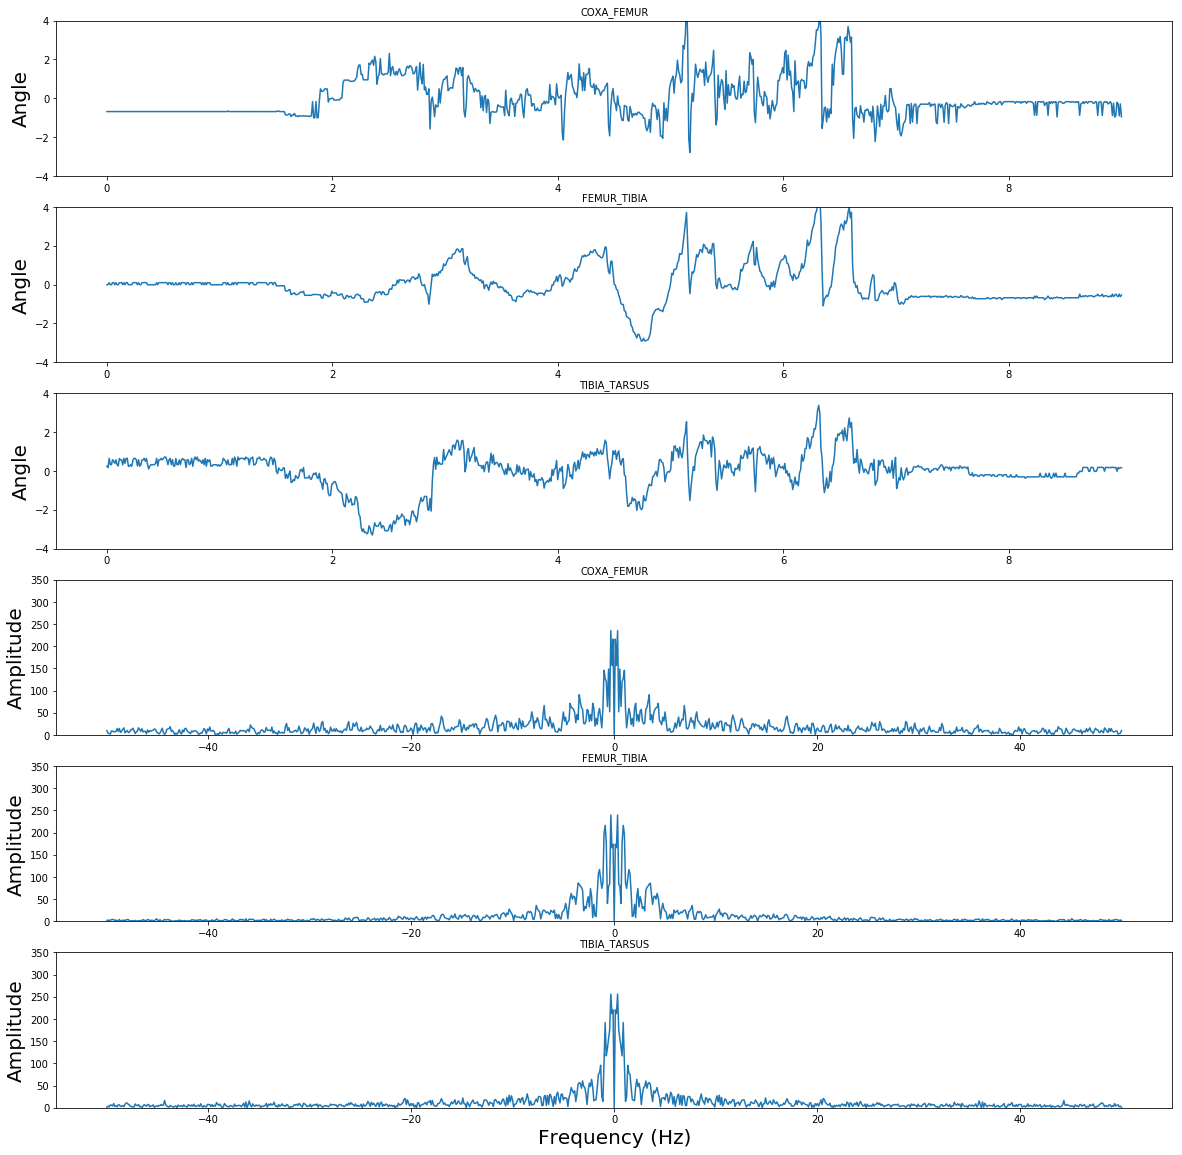

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

In [283]:
print('left middle leg')
leg = 1
fig, axs = plt.subplots(6,1,figsize=(20,20))
for i in range(3):
    id_ = leg*3 + i
    t_dom = angle1[id_]
    t_dom -= np.mean(t_dom)
    t_dom /= np.std(t_dom)
    fr = mydft(t_dom)

    fig = plt.figure(figsize=(20,3))
    axs[i].plot(t, t_dom)
    axs[i].set_title(name[i], fontsize=10)
    axs[i].set_ylabel('Angle', fontsize=20)
    #axs[i*2].set_xlabel('Time (s)', fontsize=10)
    axs[i].set_ylim(-4,4)

    fig = plt.figure(figsize=(20,3))
    axs[i+3].plot(f,shift(np.abs(fr)))
    axs[i+3].set_title(name[i], fontsize=10)
    axs[i+3].set_ylabel('Amplitude', fontsize=20)
    axs[5].set_xlabel('Frequency (Hz)', fontsize=20)
    axs[i+3].set_ylim(0,350)

left hind leg


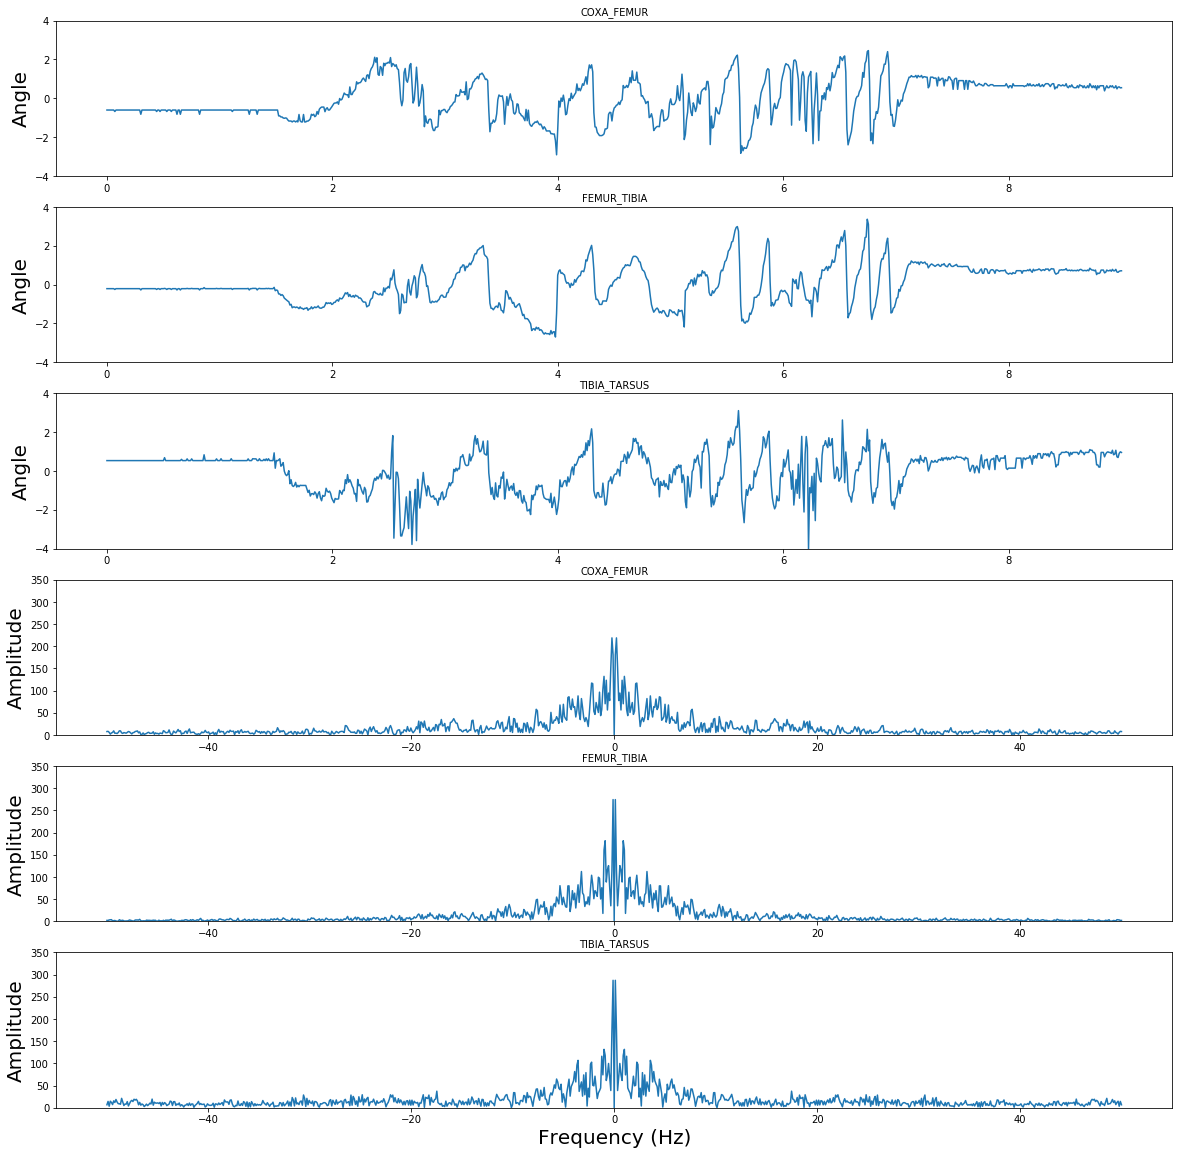

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

In [282]:
print('left hind leg')
leg = 2
fig, axs = plt.subplots(6,1,figsize=(20,20))
for i in range(3):
    id_ = leg*3 + i
    t_dom = angle1[id_]
    t_dom -= np.mean(t_dom)
    t_dom /= np.std(t_dom)
    fr = mydft(t_dom)

    fig = plt.figure(figsize=(20,3))
    axs[i].plot(t, t_dom)
    axs[i].set_title(name[i], fontsize=10)
    axs[i].set_ylabel('Angle', fontsize=20)
    #axs[i*2].set_xlabel('Time (s)', fontsize=10)
    axs[i].set_ylim(-4,4)

    fig = plt.figure(figsize=(20,3))
    axs[i+3].plot(f,shift(np.abs(fr)))
    axs[i+3].set_title(name[i], fontsize=10)
    axs[i+3].set_ylabel('Amplitude', fontsize=20)
    axs[5].set_xlabel('Frequency (Hz)', fontsize=20)
    axs[i+3].set_ylim(0,350)

right front leg


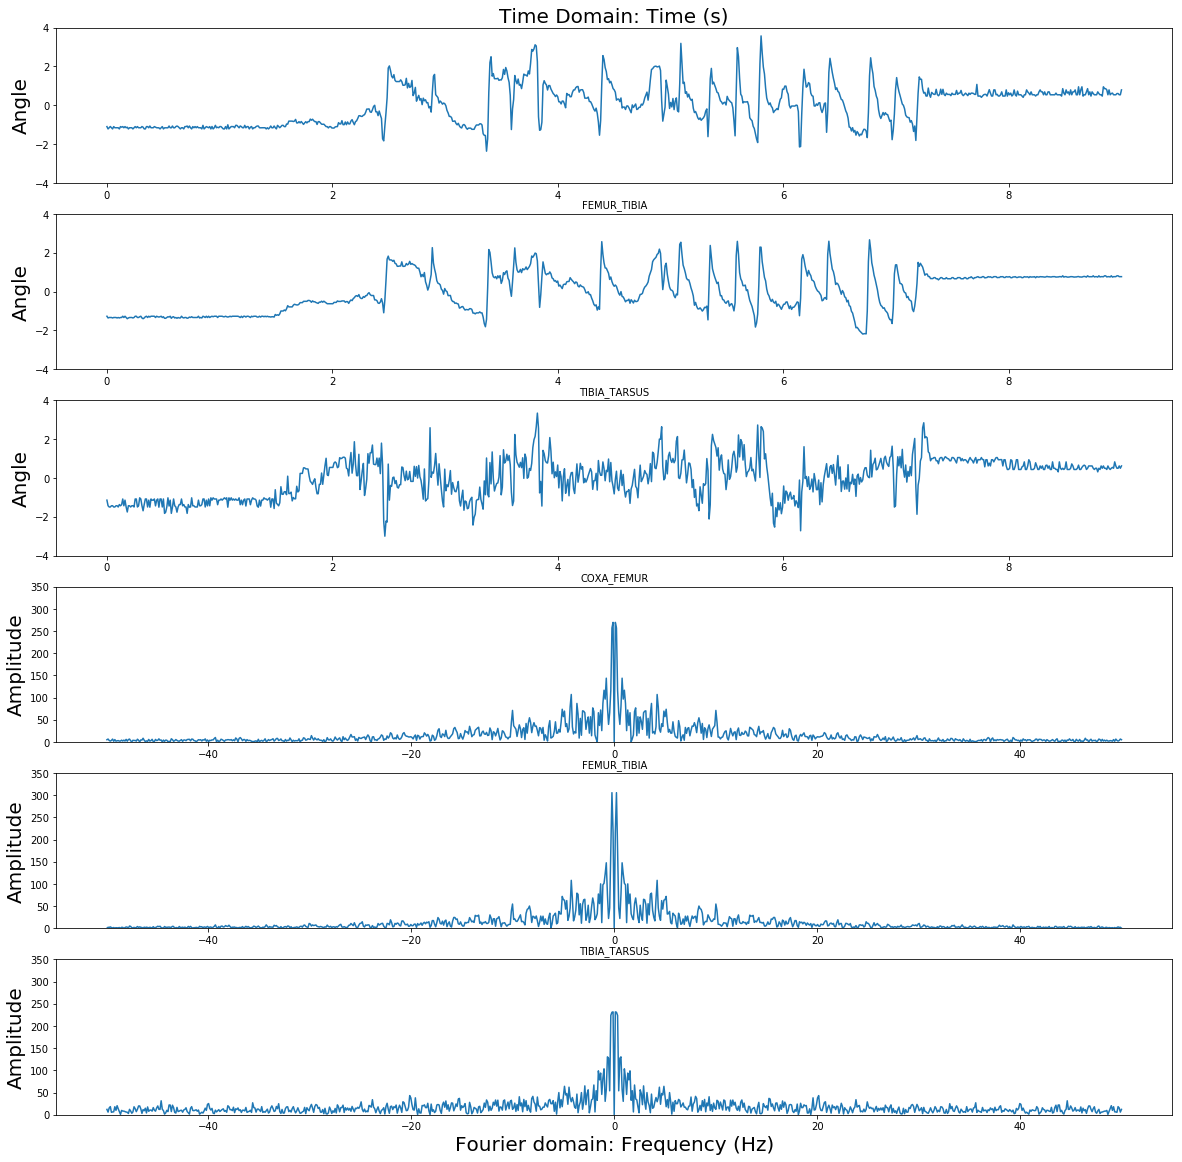

In [302]:
print('right front leg')
leg = 3
fig, axs = plt.subplots(6,1,figsize=(20,20))
#fig.suptitle('right front leg',fontsize=20)
for i in range(3):
    id_ = leg*3 + i
    t_dom = angle1[id_]
    t_dom -= np.mean(t_dom)
    t_dom /= np.std(t_dom)
    fr = mydft(t_dom)
    
    axs[i].plot(t, t_dom)
    axs[i].set_title(name[i], fontsize=10)
    axs[0].set_title('Time Domain: Time (s)', fontsize=20)
    axs[i].set_ylabel('Angle', fontsize=20)
    #axs[2].set_xlabel('Temporal Domain: Time (s)', fontsize=20)
    axs[i].set_ylim(-4,4)

    axs[i+3].plot(f,shift(np.abs(fr)))
    axs[i+3].set_title(name[i], fontsize=10)
    axs[i+3].set_ylabel('Amplitude', fontsize=20)
    axs[5].set_xlabel('Fourier domain: Frequency (Hz)', fontsize=20)
    axs[i+3].set_ylim(0,350)

In [303]:
fig.savefig('../../Pictures/fourier.jpg')

right middle leg


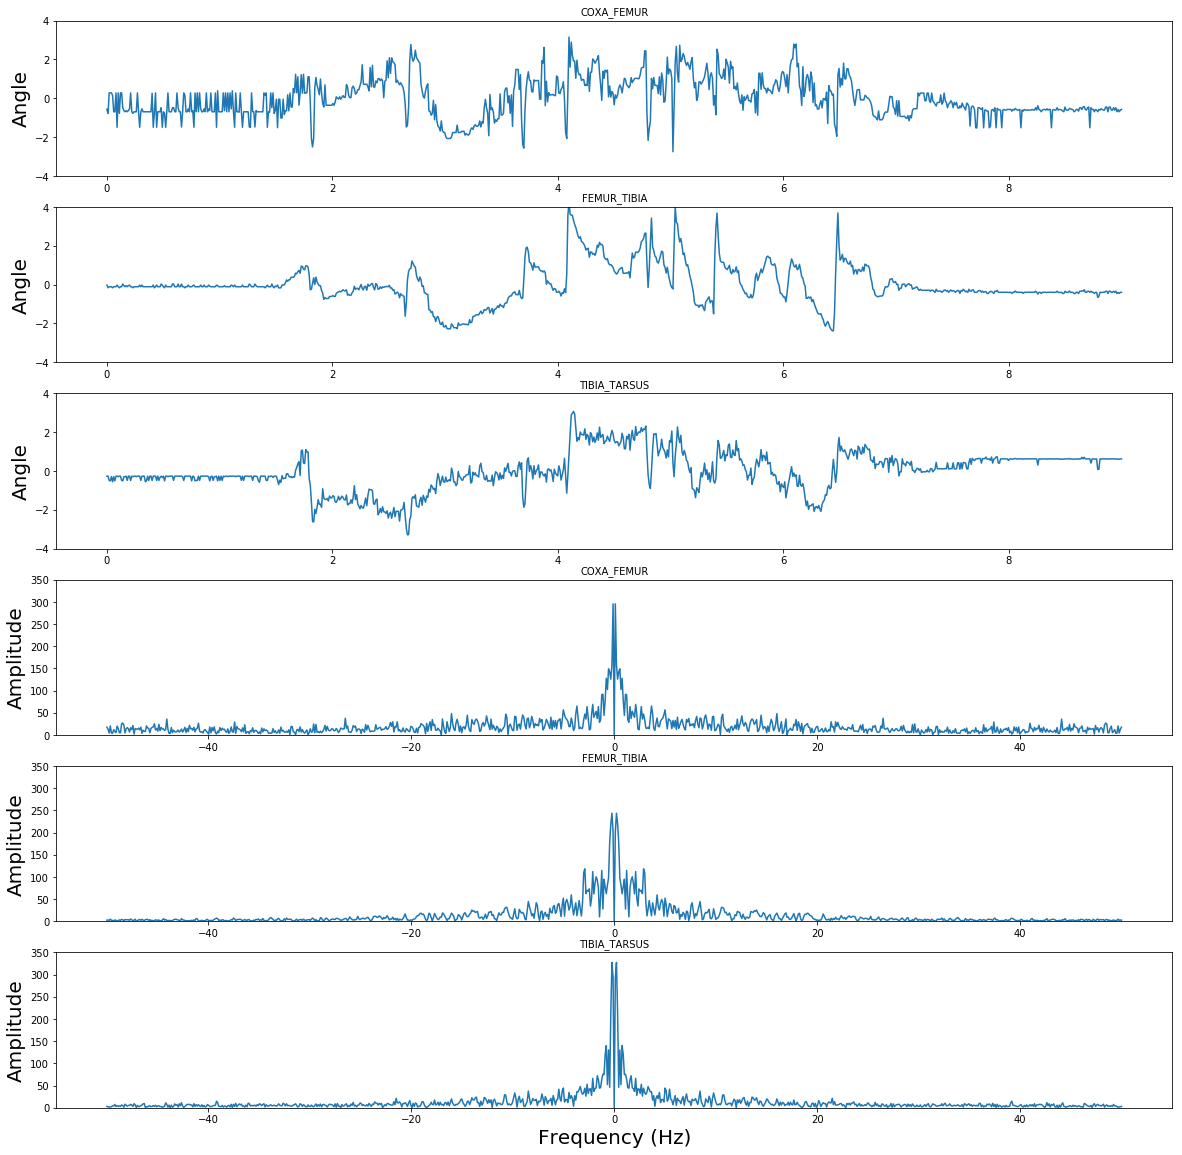

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

In [288]:
print('right middle leg')
leg = 4
fig, axs = plt.subplots(6,1,figsize=(20,20))
#fig.suptitle('right front leg',fontsize=20)
for i in range(3):
    id_ = leg*3 + i
    t_dom = angle1[id_]
    t_dom -= np.mean(t_dom)
    t_dom /= np.std(t_dom)
    fr = mydft(t_dom)

    fig = plt.figure(figsize=(20,3))
    axs[i].plot(t, t_dom)
    axs[i].set_title(name[i], fontsize=10)
    axs[i].set_ylabel('Angle', fontsize=20)
    #axs[i*2].set_xlabel('Time (s)', fontsize=10)
    axs[i].set_ylim(-4,4)

    fig = plt.figure(figsize=(20,3))
    axs[i+3].plot(f,shift(np.abs(fr)))
    axs[i+3].set_title(name[i], fontsize=10)
    axs[i+3].set_ylabel('Amplitude', fontsize=20)
    axs[5].set_xlabel('Frequency (Hz)', fontsize=20)
    axs[i+3].set_ylim(0,350)

right hind leg


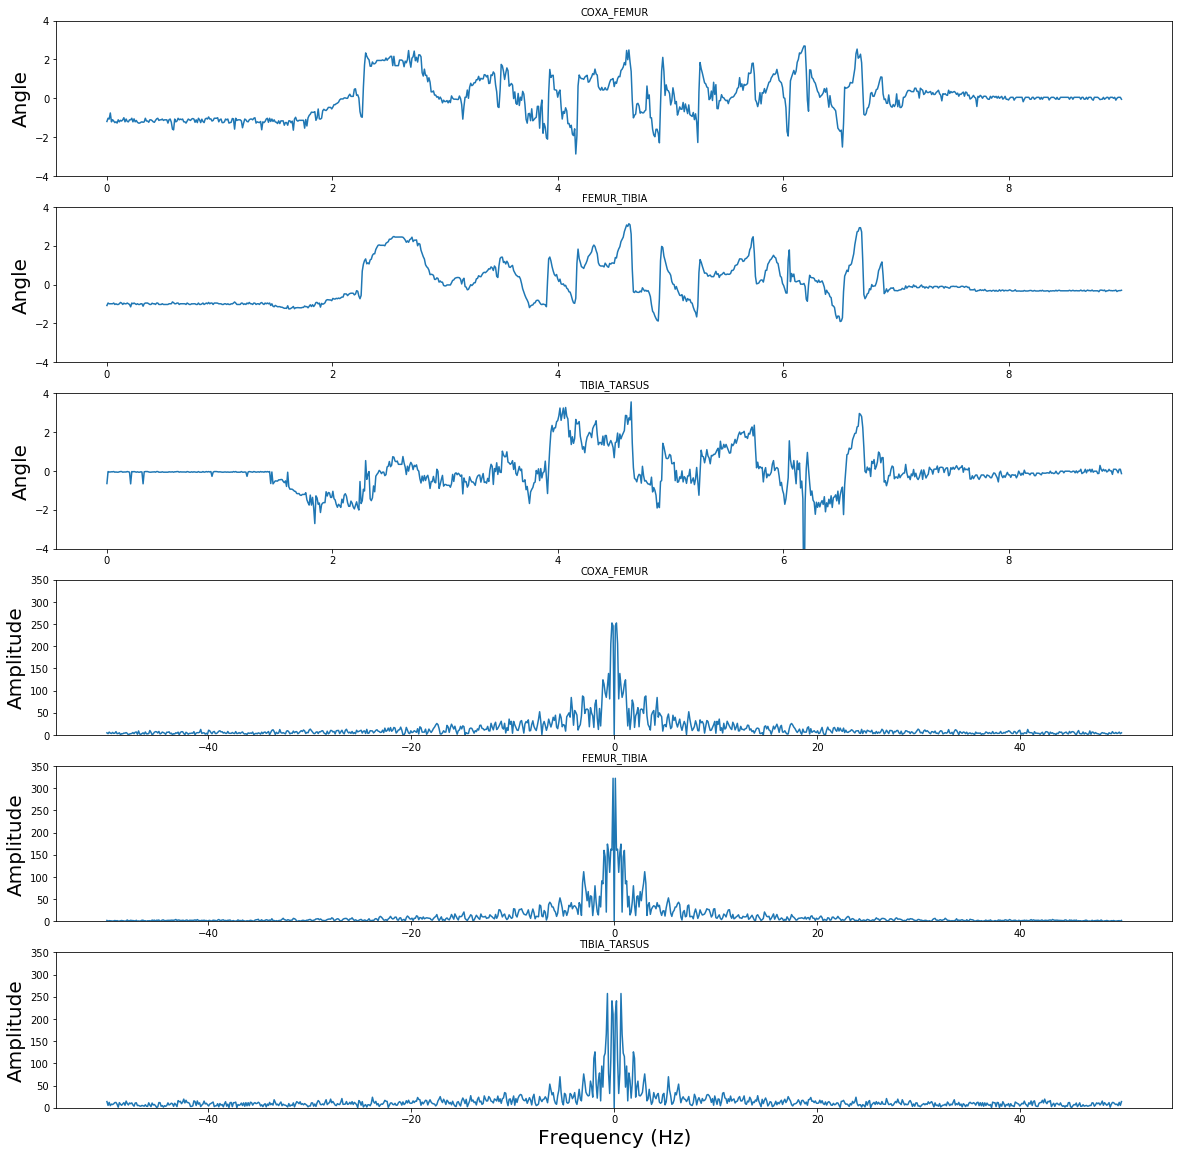

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

In [289]:
print('right hind leg')
leg = 5
fig, axs = plt.subplots(6,1,figsize=(20,20))
#fig.suptitle('right front leg',fontsize=20)
for i in range(3):
    id_ = leg*3 + i
    t_dom = angle1[id_]
    t_dom -= np.mean(t_dom)
    t_dom /= np.std(t_dom)
    fr = mydft(t_dom)

    fig = plt.figure(figsize=(20,3))
    axs[i].plot(t, t_dom)
    axs[i].set_title(name[i], fontsize=10)
    axs[i].set_ylabel('Angle', fontsize=20)
    #axs[i*2].set_xlabel('Time (s)', fontsize=10)
    axs[i].set_ylim(-4,4)

    fig = plt.figure(figsize=(20,3))
    axs[i+3].plot(f,shift(np.abs(fr)))
    axs[i+3].set_title(name[i], fontsize=10)
    axs[i+3].set_ylabel('Amplitude', fontsize=20)
    axs[5].set_xlabel('Frequency (Hz)', fontsize=20)
    axs[i+3].set_ylim(0,350)